## Mauna Loa CO2 Concentration 
Below I will look at the CO2 concentration collected at the Mauna Loa Volcano on Hawaii Island. These samples have been collected over a 60 year period. I will build a simple predictive model based on both the long term trend as well as seasonal variation.

### There are some inhomogeneities in data and the CO concentration. At these points the concentration is recorded as -99.99. Before proceeding, we must clean the data. One simple way to do this is to drop all missing values from the table. 

In [72]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from scipy import interpolate
import warnings
warnings.filterwarnings('ignore')

In [27]:
#loading data and dropping observations with missing data

df = pd.read_csv('CO2.csv', usecols=[0,1,4], skiprows=56 )
df.columns = ("year","month", "CO2")

# creating a time variable, T(i) = (i+.5)/12
df = df.assign(t=((df.index +.5)/12))

# dropping -99.99 values
df = df.drop(df[df['CO2'] == -99.99].index)

df = df.drop(["year"], axis = 1)
print(df)

     month     CO2          t
2        3  315.70   0.208333
3        4  317.45   0.291667
4        5  317.51   0.375000
6        7  315.86   0.541667
7        8  314.93   0.625000
..     ...     ...        ...
736      5  414.83  61.375000
737      6  413.96  61.458333
738      7  411.85  61.541667
739      8  410.08  61.625000
740      9  408.55  61.708333

[734 rows x 3 columns]


### Now lets fit a linear regression model on the CO2 concentraion with our time variable

In [30]:
# train a linear model on the CO2 data 
X = np.array(df['t']).reshape(-1, 1)
y = np.array(df['CO2']).reshape(-1, 1)

future = int(len(y) * 0.8)

X_train, X_test, y_train, y_test = X[:future], X[future:], y[:future], y[future:]

reg = LinearRegression()
reg.fit(X_train, y_train)

print(reg.coef_, reg.intercept_)


[[1.40669115]] [308.99165673]


### Lets plot the residual error! 

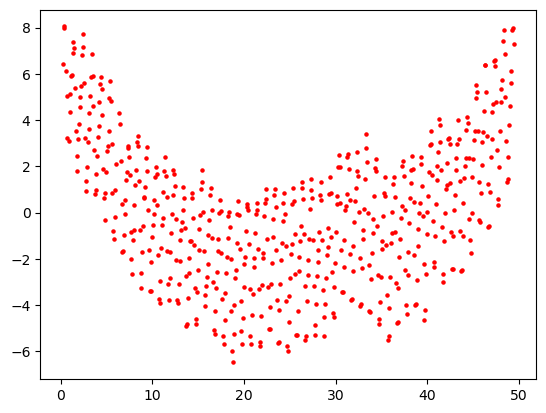

In [33]:
# plot the residual error CO2 - linear predictions

plt.scatter( X_train, y_train - reg.predict(X_train), s = 5 , color="red")
plt.show()

### Now we will look at the RMSE, Root Mean Squared Prediction Error

In [36]:
print(mean_squared_error(y_test, reg.predict(X_test), squared = False))


10.641458521874688


### And the MAPE, Mean Absolute Percentage Error

In [39]:
print(mean_absolute_percentage_error(y_test, reg.predict(X_test)))

0.02450454956443147


### Now lets fit a quadratic model, and see if we get a better fit. 

In [42]:
df = df.assign(t2=pow(df["t"],2))
X2= np.append(X, np.array(df['t2']).reshape(-1, 1), axis = 1)
print(X2)  
print(df)

[[2.08333333e-01 4.34027778e-02]
 [2.91666667e-01 8.50694444e-02]
 [3.75000000e-01 1.40625000e-01]
 ...
 [6.15416667e+01 3.78737674e+03]
 [6.16250000e+01 3.79764062e+03]
 [6.17083333e+01 3.80791840e+03]]
     month     CO2          t           t2
2        3  315.70   0.208333     0.043403
3        4  317.45   0.291667     0.085069
4        5  317.51   0.375000     0.140625
6        7  315.86   0.541667     0.293403
7        8  314.93   0.625000     0.390625
..     ...     ...        ...          ...
736      5  414.83  61.375000  3766.890625
737      6  413.96  61.458333  3777.126736
738      7  411.85  61.541667  3787.376736
739      8  410.08  61.625000  3797.640625
740      9  408.55  61.708333  3807.918403

[734 rows x 4 columns]


In [44]:
#X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)
X2_train, X2_test = X2[:future], X2[future:]
reg2 = LinearRegression().fit(X2_train, y_train)
print(reg2.coef_, reg2.intercept_)


[[0.80209702 0.0121175 ]] [314.10058419]


### Lets plot the residual error, again.

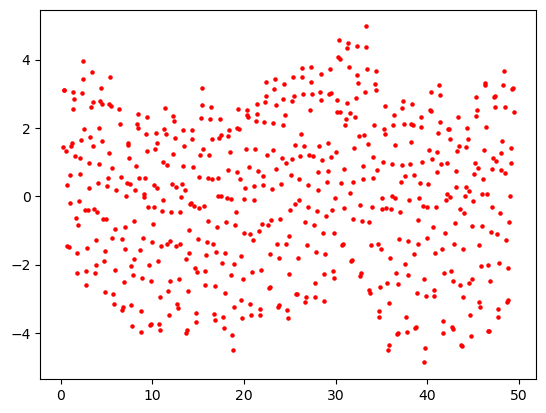

In [47]:
# plot the residual error CO2 - linear predictions

plt.scatter( X2_train[:,0], y_train - reg2.predict(X2_train), s = 5 , color="red")
plt.show()

### The residuals look better in the quadratic model, lets see the MSE and MAPE.

In [50]:
a = mean_squared_error(y_test, reg2.predict(X2_test), squared = False)
print(mean_squared_error(y_test, reg2.predict(X2_test), squared = False))

2.5013322194897802


In [52]:
b = mean_absolute_percentage_error(y_test, reg2.predict(X2_test))
print(mean_absolute_percentage_error(y_test, reg2.predict(X2_test)))

0.005320319129740849


### Lets fit a cubic model now!

In [55]:

df = df.assign(t3=pow(df["t"],3))


In [57]:
X3= np.append(X2, np.array(df['t3']).reshape(-1, 1), axis = 1)
print(X3) 

[[2.08333333e-01 4.34027778e-02 9.04224537e-03]
 [2.91666667e-01 8.50694444e-02 2.48119213e-02]
 [3.75000000e-01 1.40625000e-01 5.27343750e-02]
 ...
 [6.15416667e+01 3.78737674e+03 2.33081477e+05]
 [6.16250000e+01 3.79764062e+03 2.34029604e+05]
 [6.17083333e+01 3.80791840e+03 2.34980298e+05]]


In [59]:
#X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.2)
X3_train, X3_test = X3[:future], X3[future:]
reg3 = LinearRegression().fit(X3_train, y_train)
print(reg3.coef_, reg3.intercept_)
print()

[[ 6.24895409e-01  2.09575674e-02 -1.18323397e-04]] [314.85852616]



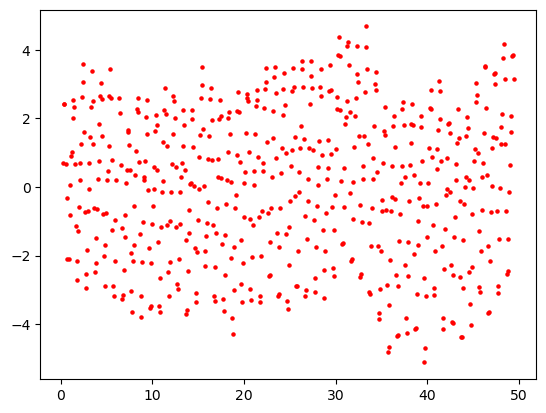

In [61]:
# plot the residual error CO2 - linear predictions

plt.scatter( X3_train[:,0], y_train - reg3.predict(X3_train), s = 5 , color="red")
plt.show()

In [63]:
print(mean_squared_error(y_test, reg3.predict(X3_test), squared = False))

4.1493707121348455


In [65]:
print(mean_absolute_percentage_error(y_test, reg3.predict(X3_test)))

0.008483502723897389


### Now lets remove the trend and fit a periodic signal
I will average out the residuals from each month and then use that to fit a periodic signal

### Based on residual plots prediction errors, a degree 2 polynomial seems to be sufficient to represent the data

In [74]:
df["trend"]=(reg2.predict(df[["t", "t2"]].to_numpy()))
df_train =df[:future]
df_test = df[future:]

# get average period
P= []
for i in range(1,13):
    newdf = df_train[(df.month == i)]          
    dif = newdf["CO2"][:future]-newdf["trend"][:future]
    x = dif.to_numpy()
    P.append(x.sum()/len(x))
  
for i in range(1,13):
    for ind in df_train.index:
        if df_train["month"][ind]  == i:
            df_train.loc[ind, 'Period'] = P[i-1]
            

df_train["model"] = df_train.trend + df_train.Period

for i in range(1,13):
    for ind in df_test.index:
        if df_test["month"][ind]  == i:
            df_test.loc[ind, 'Period'] = P[i-1]
            
    
df_test["model"] = df_test.trend + df_test.Period

print(df_train) 

for i in range(1,13):
    for ind in df.index:
        if df["month"][ind]  == i:
            df.loc[ind, 'Period'] = P[i-1]
            
df["model"] = df.trend + df.Period

     month     CO2          t           t2             t3       trend  \
2        3  315.70   0.208333     0.043403       0.009042  314.268214   
3        4  317.45   0.291667     0.085069       0.024812  314.335560   
4        5  317.51   0.375000     0.140625       0.052734  314.403075   
6        7  315.86   0.541667     0.293403       0.158927  314.538609   
7        8  314.93   0.625000     0.390625       0.244141  314.606628   
..     ...     ...        ...          ...            ...         ...   
589      2  383.71  49.125000  2413.265625  118551.673828  382.746346   
590      3  384.34  49.208333  2421.460069  119156.014251  382.912483   
591      4  386.23  49.291667  2429.668403  119762.405020  383.078789   
592      5  386.41  49.375000  2437.890625  120370.849609  383.245264   
593      6  385.87  49.458333  2446.126736  120981.351490  383.411906   

       Period       model  
2    1.355569  315.623783  
3    2.561858  316.897418  
4    2.982891  317.385965  
6    0.7762

### Now I'll interpolate and plot our Periodic function

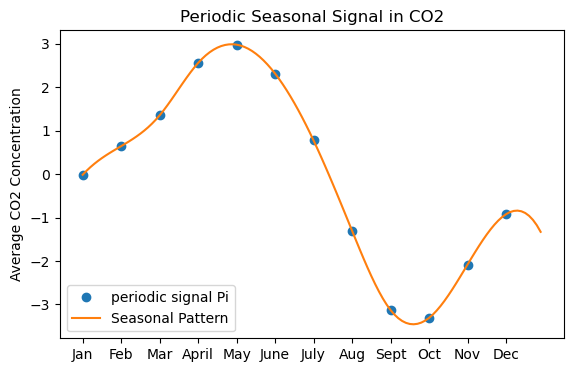

In [76]:
from scipy.interpolate import CubicSpline
x = np.arange(0,12)
fig, ax = plt.subplots(figsize=(6.5, 4))
cs = CubicSpline(x, P)
xs = np.arange(0, 12, .1)
ax.plot(x, P, 'o', label='periodic signal Pi')
ax.plot(xs, cs(xs), label="Seasonal Pattern")
plt.xticks(x, ["Jan", "Feb", "Mar", "April", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec" ])
#plt.plot(P)
plt.ylabel("Average CO2 Concentration")
plt.title("Periodic Seasonal Signal in CO2")
ax.legend(loc='lower left', ncol=1)
plt.show()

### Now lets plot the trend and periodic signal over the the entire timeline 

2
[[314.25529445 314.91462026 315.62378277 ... 313.34670708 314.25529445
  313.34670708]
 [314.32264076 314.98196658 315.69112909 ... 313.41405339 314.32264076
  313.41405339]
 [314.39015537 315.04948119 315.7586437  ... 313.48156801 314.39015537
  313.48156801]
 ...
 [409.34358894 410.00291475 410.71207726 ... 408.43500157 409.34358894
  408.43500157]
 [409.53480302 410.19412884 410.90329135 ... 408.62621566 409.53480302
  408.62621566]
 [409.72618541 410.38551123 411.09467374 ... 408.81759804 409.72618541
  408.81759804]]
(734,) (734,)


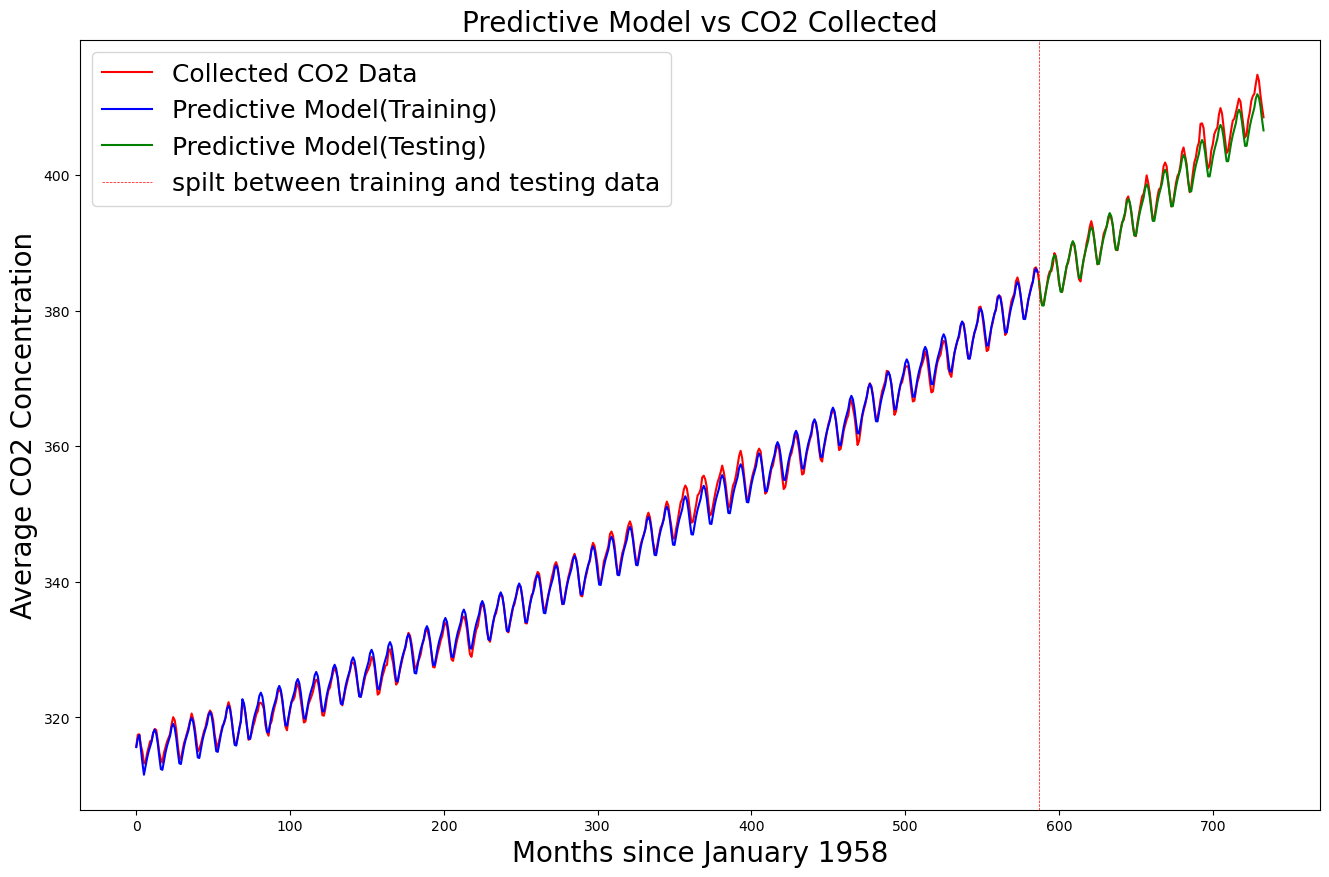

In [78]:
# make a repeating period pattern
m = X.shape[0]% 12
print(m)
periods = np.tile(P, 62) 
periods = np.delete(periods, slice(733,743))


print(np.add(reg2.predict(X2),periods))
print(reg2.predict(X2).reshape((734)).shape, periods.shape)

#plot the linear trend and the periods against the 
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(y, c = "r", label= "Collected CO2 Data")
ax.plot(range(0,future), df_train['model'],c= "b", label="Predictive Model(Training)")
ax.plot(range(future, len(y) ), df_test['model'],c= "g", label="Predictive Model(Testing)")
#ax.plot(reg2.predict(X2).reshape((734))+ periods, label="Predictive Model")
#ax.plot(reg2.predict(X2).reshape((734)), label="Predictive Model")
#ax.plot(df['trend'])

plt.ylabel("Average CO2 Concentration", fontsize = 20)
plt.title("Predictive Model vs CO2 Collected", fontsize = 20)
plt.xlabel("Months since January 1958", fontsize = 20)
plt.axvline(x = future, color = 'r', linewidth=.5,linestyle= "dashed", label = 'spilt between training and testing data')
ax.legend(loc='upper left', ncol=1, fontsize = 18)

plt.show()

### Lets compute the RMSE and the MAPE with respect to the test set for this final model.

In [82]:
c= mean_squared_error(y_test, df_test["model"], squared = False)
print(mean_squared_error(y_test, df_test["model"], squared = False))

1.1493602690794416


In [84]:
d = mean_absolute_percentage_error(y_test, df_test["model"])
print(mean_absolute_percentage_error(y_test, df_test["model"]))

0.002085916594799103


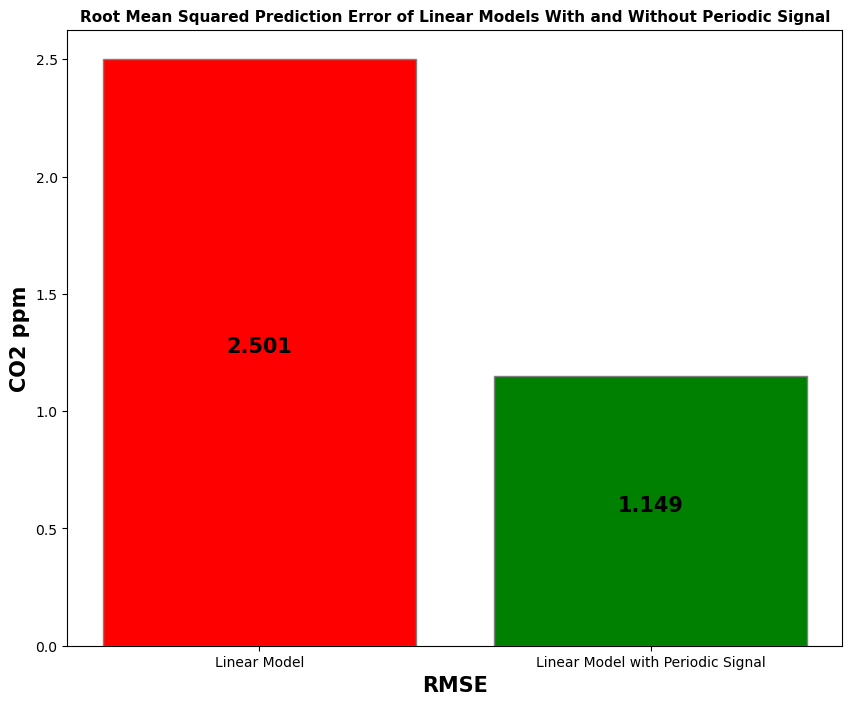

In [86]:

fig = plt.subplots(figsize =(10, 8)) 


plt.bar('Linear Model',a , color ='r', 
        edgecolor ='grey', label ='Linear Model')
plt.bar('Linear Model with Periodic Signal', c, color ='g', 
        edgecolor ='grey', label ='Linear Model with Periodic Signal') 
plt.text(0, a/2,round(a,3),fontweight ='bold', fontsize = 15, ha= "center")
plt.text(1, c/2,round(c,3),fontweight ='bold', fontsize = 15, ha= "center")
plt.xlabel('RMSE', fontweight ='bold', fontsize = 15) 
plt.ylabel("CO2 ppm",fontweight ='bold', fontsize = 15)
plt.title("Root Mean Squared Prediction Error of Linear Models With and Without Periodic Signal" ,fontweight ='bold', fontsize = 11)
plt.show()        

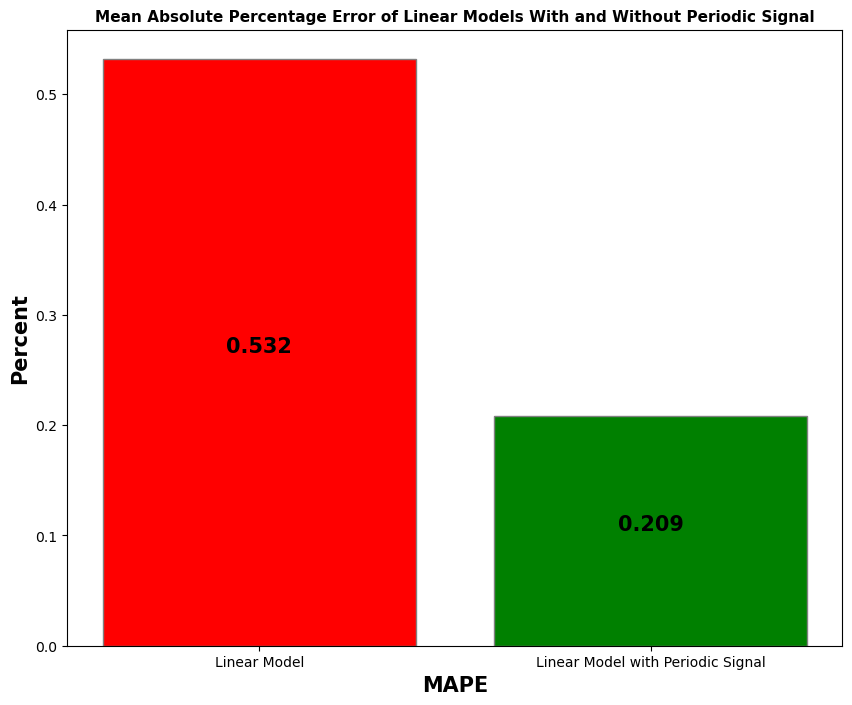

In [88]:
fig = plt.subplots(figsize =(10, 8)) 

plt.bar('Linear Model',b*100 , color ='r', 
        edgecolor ='grey', label ='Linear Model')
plt.bar('Linear Model with Periodic Signal', d*100, color ='g', 
        edgecolor ='grey', label ='Linear Model with Periodic Signal') 
plt.text(0, b*100/2,round(b*100,3),fontweight ='bold', fontsize = 15, ha= "center")
plt.text(1, d*100/2,round(d*100,3),fontweight ='bold', fontsize = 15, ha= "center")
plt.xlabel('MAPE', fontweight ='bold', fontsize = 15) 
plt.ylabel("Percent",fontweight ='bold', fontsize = 15)
plt.title("Mean Absolute Percentage Error of Linear Models With and Without Periodic Signal" ,fontweight ='bold', fontsize = 11)
plt.show()  

### We can see the the addition of the seasonal component creates marked improvement over just using a quadratic trend in the model